In [105]:
import csv
import numpy as np
import ast
#import matplotlib.pyplot as plt

from pymatgen.util.plotting_utils import get_publication_quality_plot

# IBRION=2

In [154]:
q=open('results_double_20170104.csv')
q_Reader=csv.reader(q)
qlist=list(q_Reader)
nq = len(qlist)

#indices = [i for i in range(1, nq) 
#           if abs(float(qlist[i][9])-float(qlist[i][10]))/float(qlist[i][10]) < 0.02]
#print(indices, len(indices))

# Given there are only 52 structures when IBRION=1, we select the corresponding 
# results for the case of IBRION=2

indices = []
for i in range(1, nq):
    Verr = abs(float(qlist[i][9])-float(qlist[i][10]))/float(qlist[i][10])
    in_the_list = any([qlist[i][0] == s and qlist[i][1] == p and Verr < 0.02
                      for s, p in zip(sub_formula_ib1, parent_formula_ib1)])
    if in_the_list:
        indices.append(i)
        
print(indices, len(indices))

[1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 39, 41, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62] 50


In [159]:
subs_ib2 = [qlist[i][0] for i in indices]
parent_ib2 = [qlist[i][1] for i in indices]
mappings = [ast.literal_eval(qlist[i][3]) for i in indices]
Natoms=[float(qlist[i][4]) for i in indices]

scaled_Vi=[float(qlist[i][5]) for i in indices]
no_Vi=[float(qlist[i][6]) for i in indices]
mm_Vi=[float(qlist[i][7]) for i in indices]
as_Vi=[float(qlist[i][8]) for i in indices]
scaled_Vf=[float(qlist[i][9]) for i in indices]
no_Vf=[float(qlist[i][10]) for i in indices]
mm_Vf=[float(qlist[i][11]) for i in indices]
as_Vf=[float(qlist[i][12]) for i in indices]

scaled_CPU = [float(qlist[i][21]) for i in indices]
no_CPU = [float(qlist[i][22]) for i in indices]
mm_CPU = [float(qlist[i][23]) for i in indices]
as_CPU = [float(qlist[i][24]) for i in indices]

scaled_E=[float(qlist[i][25]) for i in indices]
no_E=[float(qlist[i][26]) for i in indices]
mm_E=[float(qlist[i][27]) for i in indices]
as_E=[float(qlist[i][28]) for i in indices]

zero_indices = [i for i, m in enumerate(mm_E) if abs(m) < 1e-6]
print(zero_indices)

cpuratio_s_n = [s/n for s, n in zip(scaled_CPU, no_CPU)]
cpuratio_m_n = [m/n for m, n in zip(mm_CPU, no_CPU)]
cpuratio_a_n = [a/n for a, n in zip(as_CPU, no_CPU)]
dE_s_n = [(s - n)*1000.0 for s, n in zip(scaled_E, no_E)]
dE_m_n = [(m - n)*1000.0 for m, n in zip(mm_E, no_E)]
dE_a_n = [(a - n)*1000.0 for a, n in zip(as_E, no_E)]

true_vf = [(n + s)/2.0 for n, s in zip(no_Vf, scaled_Vf)]

[48]


In [160]:
less_1 = len([1 for r in cpuratio_s_n if r < 1.0])
greater_1 = len([1 for r in cpuratio_s_n if r > 1])
print(len(cpuratio_s_n), less_1, greater_1)

50 30 20


In [161]:
less_1 = len([1 for r in cpuratio_m_n if r < 1.0])
greater_1 = len([1 for r in cpuratio_m_n if r > 1])
print(len(cpuratio_m_n), less_1, greater_1)

50 8 42


In [162]:
less_1 = len([1 for r in cpuratio_a_n if r < 1.0])
greater_1 = len([1 for r in cpuratio_a_n if r > 1])
print(len(cpuratio_a_n), less_1, greater_1)

50 23 27


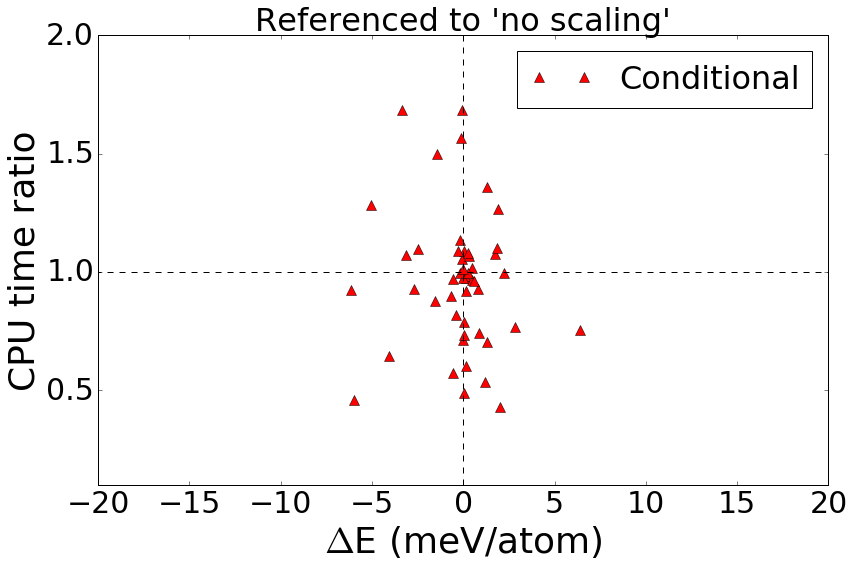

In [163]:
%matplotlib inline
gridy = np.arange(0.1, 15.0, 0.1)
x = [0] * len(gridy)

gridx = np.arange(-300, 200, 1)
y = [1] * len(gridx) 

plt = get_publication_quality_plot(12,8)
plt.plot(dE_s_n, cpuratio_s_n, 'r^', markersize=10, label="Conditional")
plt.plot(x, gridy, "k--")
plt.plot(gridx, y, "k--")
plt.xlabel("$\Delta$E (meV/atom)")
plt.ylabel("CPU time ratio")
plt.legend(fontsize=32)
plt.title("Referenced to 'no scaling'", fontsize=32)
plt.xlim(-20, 20)
plt.ylim(0.1, 2)
plt.tight_layout()
plt.show()

50 18 32


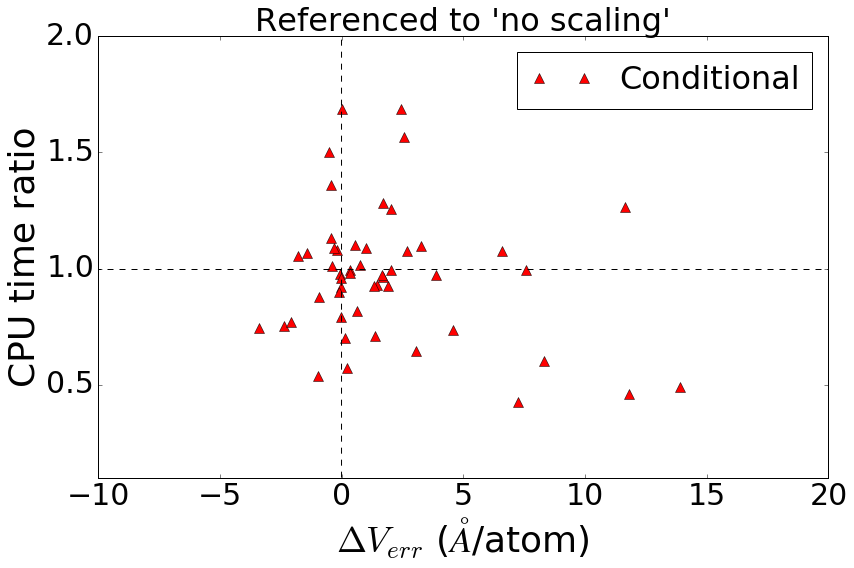

In [164]:
%matplotlib inline
gridy = np.arange(0.1, 150.0, 0.1)
x = [0] * len(gridy)

gridx = np.arange(-300, 200, 1)
y = [1] * len(gridx) 

ref_vi_s = [abs(s - t) for s, t in zip(scaled_Vi, true_vf)]
ref_vi_n = [abs(n - t) for n, t in zip(no_Vi, true_vf)]
diff = [(n - s)/Natoms[i] for i, (n, s) in enumerate(zip(ref_vi_n, ref_vi_s))]

num_neg = len([l for l in diff if l < 0])
num_pos = len([l for l in diff if l > 0])
print(len(diff), num_neg, num_pos)

plt = get_publication_quality_plot(12,8)

plt.plot(diff, cpuratio_s_n, 'r^', markersize=10, label="Conditional")

plt.plot(x, gridy, "k--")
plt.plot(gridx, y, "k--")
plt.xlabel("$\\Delta V_{err}$ ($\AA$/atom)")
plt.ylabel("CPU time ratio")
plt.legend(fontsize=32)
plt.title("Referenced to 'no scaling'", fontsize=32)
plt.xlim(-10, 20)
plt.ylim(0.1, 2)
plt.tight_layout()
plt.show()

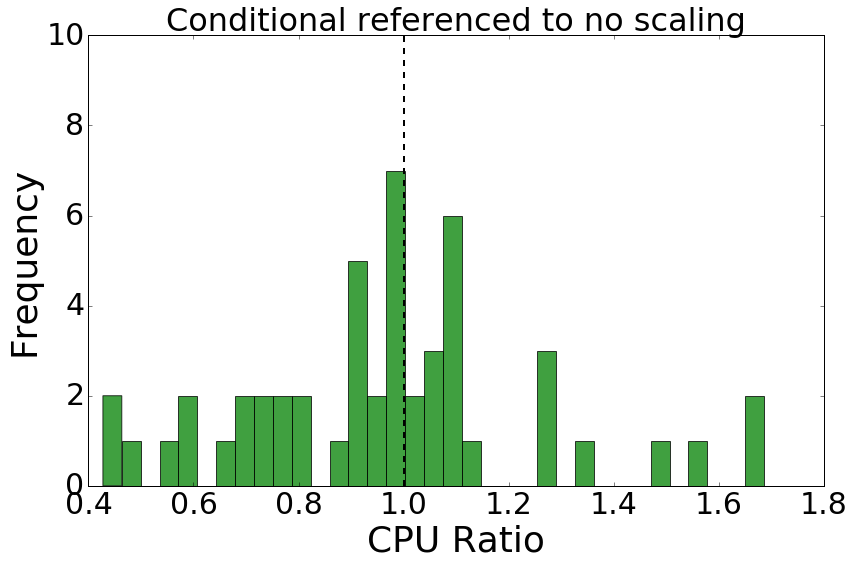

In [165]:
%matplotlib inline

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(cpuratio_s_n, 35, facecolor='green', alpha=0.75)
plt.xlabel("CPU Ratio")
plt.ylabel("Frequency")
plt.title("Conditional referenced to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# Isovalent substitutions only

In [166]:
from pymatgen.core import Specie

iso_indices = []

for i, m in enumerate(mappings):
    is_iso = True

    for k, v in m.items():
        if k[-1] not in ["+", "-"] and v[-1] not in ["+", "-"]:
            break
            
        sp1, sp2 = Specie.from_string(k), Specie.from_string(v)
        if sp1.oxi_state != sp2.oxi_state:
            is_iso = False
            break
    
    if is_iso:
        iso_indices.append(i)

print(iso_indices, len(iso_indices))

Natoms_i=[Natoms[i] for i in iso_indices]

scaled_Vi_i=[scaled_Vi[i] for i in iso_indices]
no_Vi_i=[no_Vi[i] for i in iso_indices]
mm_Vi_i=[mm_Vi[i] for i in iso_indices]
as_Vi_i=[as_Vi[i] for i in iso_indices]
scaled_Vf_i=[scaled_Vf[i] for i in iso_indices]
no_Vf_i=[no_Vf[i] for i in iso_indices]
mm_Vf_i=[mm_Vf[i] for i in iso_indices]
as_Vf_i=[as_Vf[i] for i in iso_indices]

scaled_CPU_i = [scaled_CPU[i] for i in iso_indices]
no_CPU_i = [no_CPU[i] for i in iso_indices]
mm_CPU_i = [mm_CPU[i] for i in iso_indices]
as_CPU_i = [as_CPU[i] for i in iso_indices]

scaled_E_i=[scaled_E[i] for i in iso_indices]
no_E_i=[no_E[i] for i in iso_indices]
mm_E_i=[mm_E[i] for i in iso_indices]
as_E_i=[as_E[i] for i in iso_indices]

cpuratio_s_n_i = [s/n for s, n in zip(scaled_CPU_i, no_CPU_i)]
cpuratio_m_n_i = [m/n for m, n in zip(mm_CPU_i, no_CPU_i)]
cpuratio_a_n_i = [a/n for a, n in zip(as_CPU_i, no_CPU_i)]
dE_s_n_i = [(s - n)*1000.0 for s, n in zip(scaled_E_i, no_E_i)]
dE_m_n_i = [(m - n)*1000.0 for m, n in zip(mm_E_i, no_E_i)]
dE_a_n_i = [(a - n)*1000.0 for a, n in zip(as_E_i, no_E_i)]

true_vf_i = [(n + s)/2.0 for n, s in zip(no_Vf_i, scaled_Vf_i)]

[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 28, 29, 30, 33, 34, 35, 36, 39, 44, 45, 46, 47, 48, 49] 35


In [169]:
less_1 = len([1 for r in cpuratio_s_n_i if r < 1.0])
greater_1 = len([1 for r in cpuratio_s_n_i if r > 1])
print(len(cpuratio_s_n_i), less_1, greater_1)

35 22 13


35 13 22


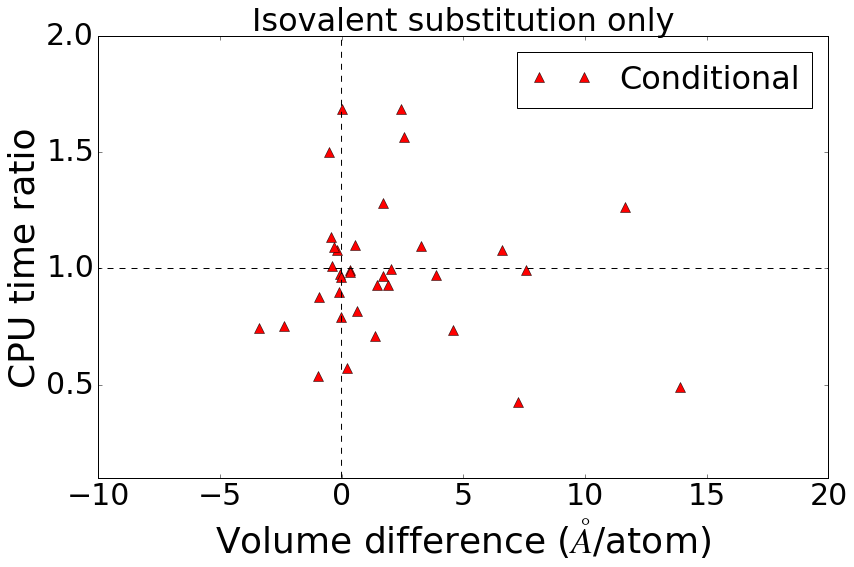

In [167]:
%matplotlib inline
gridy = np.arange(0.1, 150.0, 0.1)
x = [0] * len(gridy)

gridx = np.arange(-300, 200, 1)
y = [1] * len(gridx) 

ref_vi_s = [abs(s - t) for s, t in zip(scaled_Vi_i, true_vf_i)]
ref_vi_n = [abs(n - t) for n, t in zip(no_Vi_i, true_vf_i)]
diff = [(n - s)/Natoms_i[i] for i, (n, s) in enumerate(zip(ref_vi_n, ref_vi_s))]

num_neg = len([l for l in diff if l < 0])
num_pos = len([l for l in diff if l > 0])
print(len(diff), num_neg, num_pos)

plt = get_publication_quality_plot(12,8)

plt.plot(diff, cpuratio_s_n_i, 'r^', markersize=10, label="Conditional")

plt.plot(x, gridy, "k--")
plt.plot(gridx, y, "k--")
plt.xlabel("Volume difference ($\AA$/atom)")
plt.ylabel("CPU time ratio")
plt.legend(fontsize=32)
plt.title("Isovalent substitution only", fontsize=32)
plt.xlim(-10, 20)
plt.ylim(0.1, 2)
plt.tight_layout()
plt.show()

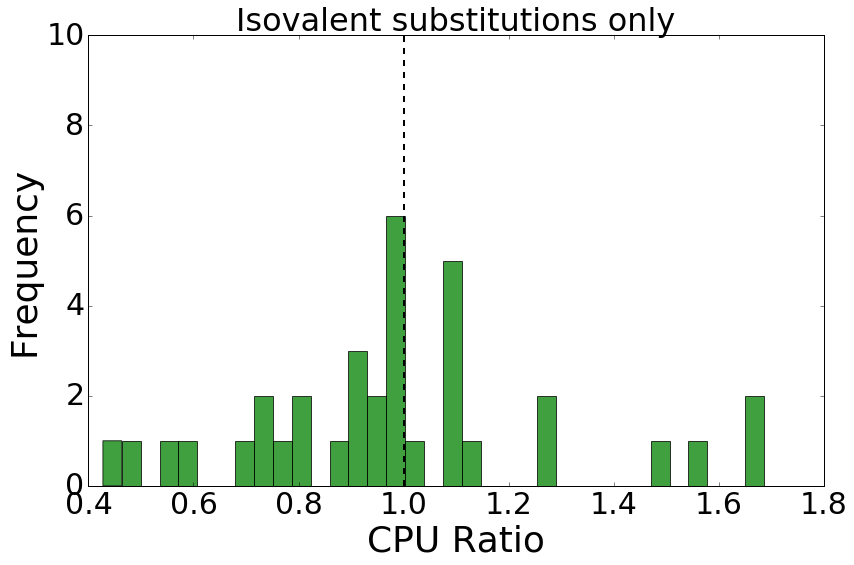

In [168]:
%matplotlib inline

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(cpuratio_s_n_i, 35, facecolor='green', alpha=0.75)
plt.xlabel("CPU Ratio")
plt.ylabel("Frequency")
plt.title("Isovalent substitutions only", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# Performance evaluation IBRION=2

In [172]:
q=open('results_performance_CVP_no_20170116_ib2.csv')
q_Reader=csv.reader(q)
qlist=list(q_Reader)
nq = len(qlist)

# indices = [i for i in range(1, nq) 
#            if abs(float(qlist[i][7])-float(qlist[i][8]))/float(qlist[i][8]) < 0.02]
# print(indices, len(indices))

# Given there are only 52 structures when IBRION=1, we select the corresponding 
# results for the case of IBRION=2

indices = []
for i in range(1, nq):
    Verr = abs(float(qlist[i][7])-float(qlist[i][8]))/float(qlist[i][8])
    in_the_list = any([qlist[i][0] in subs_ib2 and qlist[i][1] in parent_ib2 and Verr < 0.02])
    if in_the_list:
        indices.append(i)
        
print(indices, len(indices))

sub_formula = [qlist[i][0] for i in indices]
Natoms=[float(qlist[i][4]) for i in indices]
conditional_Vi=[float(qlist[i][5]) for i in indices]
no_Vi=[float(qlist[i][6]) for i in indices]
conditional_Vf=[float(qlist[i][7]) for i in indices]
no_Vf=[float(qlist[i][8]) for i in indices]

conditional_nionic=[float(qlist[i][9]) for i in indices]
no_nionic=[float(qlist[i][10]) for i in indices]
conditional_nelect=[float(qlist[i][11]) for i in indices]
no_nelect=[float(qlist[i][12]) for i in indices]
conditional_ncg=[float(qlist[i][13]) for i in indices]
no_ncg=[float(qlist[i][14]) for i in indices]
conditional_cpu = [float(qlist[i][15]) for i in indices]
no_cpu = [float(qlist[i][16]) for i in indices]

cpuratio = [s/n for s, n in zip(conditional_cpu, no_cpu)]
nionic_radio = [s/n for s, n in zip(conditional_nionic, no_nionic)]
nionic_nelect = [s/n for s, n in zip(conditional_nelect, no_nelect)]
nionic_ncg = [s/n for s, n in zip(conditional_ncg, no_ncg)]

[1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 59, 60] 50


In [173]:
for i in indices:
    print(qlist[i][4:])

['58', '797.2871487', '930.8619993', '845.7401299', '844.6704067', '18', '16', '101', '101', '1464829', '1463371', '4978.317', '6096.142']
['88', '1251.27708', '1258.061037', '1310.837793', '1311.676733', '23', '24', '120', '123', '373113', '380924', '1852.505', '1900.763']
['26', '359.6418023', '371.3173112', '425.4604798', '422.800936', '89', '81', '548', '495', '2082772', '1886461', '2731.82', '2011.333']
['34', '420.7492523', '304.0765292', '355.1247086', '355.2493191', '24', '26', '127', '137', '919888', '1021992', '1661.592', '1466.457']
['48', '564.314996', '702.5772782', '686.7539951', '692.6180926', '79', '87', '408', '431', '2354689', '2477210', '4982.651', '6615.942']
['56', '738.364917', '657.0716089', '762.518638', '765.0409599', '69', '69', '366', '354', '1515019', '1433640', '3786.078', '4078.551']
['56', '787.6090955', '1254.313133', '742.0298748', '737.5993455', '22', '24', '117', '114', '1521893', '1478592', '5854.479', '9734.122']
['36', '431.7973951', '508.4855557',

50 23


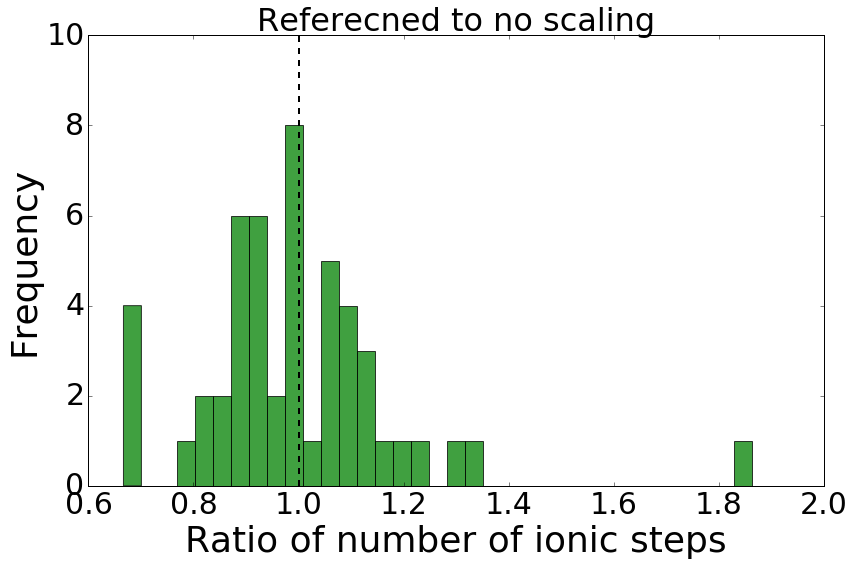

In [174]:
%matplotlib inline

nionic_ratio = [float(s)/n for s, n in zip(conditional_nionic, no_nionic)]

print(len(nionic_ratio), len([i for i in nionic_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(nionic_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("Ratio of number of ionic steps")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

50 28


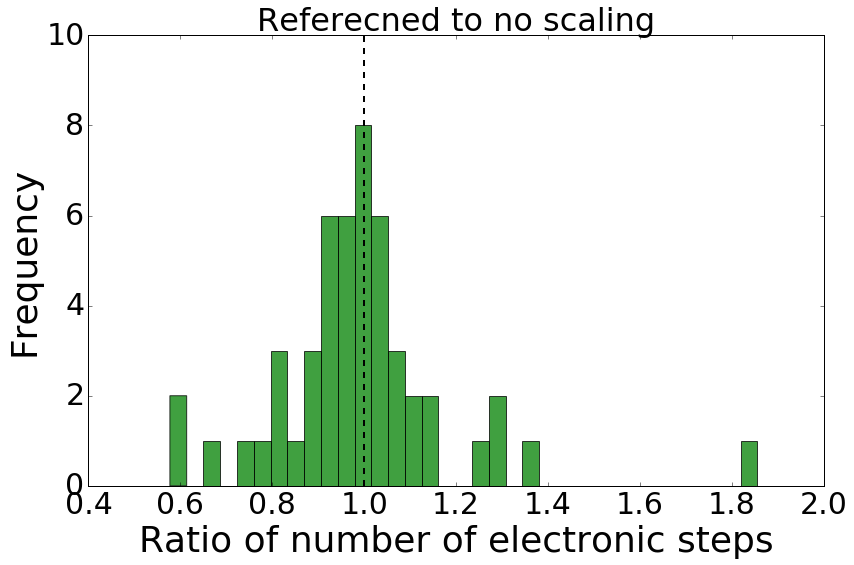

In [175]:
%matplotlib inline

nelect_ratio = [float(s)/n for s, n in zip(conditional_nelect, no_nelect)]

print(len(nelect_ratio), len([i for i in nelect_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(nelect_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("Ratio of number of electronic steps")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

50 29


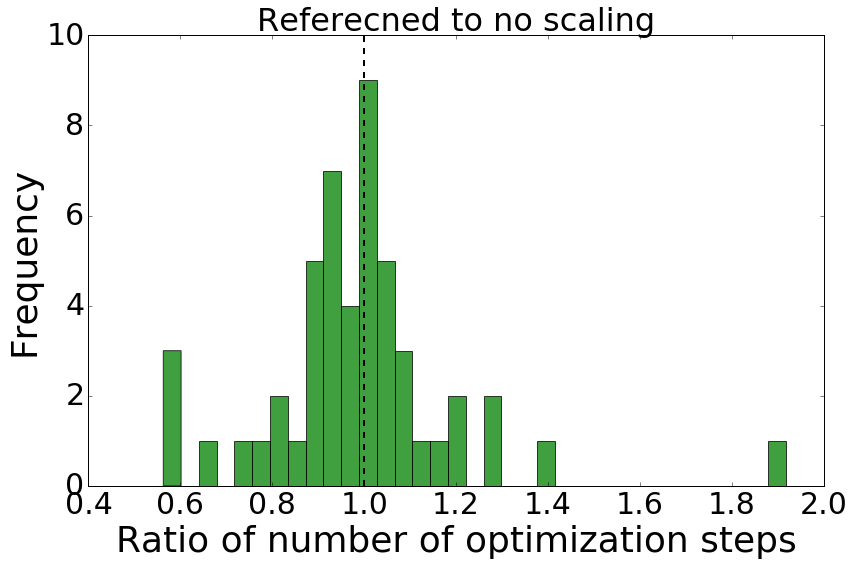

In [176]:
%matplotlib inline

ncg_ratio = [float(s)/n for s, n in zip(conditional_ncg, no_ncg)]

print(len(ncg_ratio), len([i for i in ncg_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(ncg_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("Ratio of number of optimization steps")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# Performance evaluation IBRION=1

In [177]:
q=open('results_performance_CVP_no_20170116_ib1.csv')
q_Reader=csv.reader(q)
qlist=list(q_Reader)
nq = len(qlist)

#indices = [i for i in range(1, nq) 
#            if abs(float(qlist[i][7])-float(qlist[i][8]))/float(qlist[i][8]) < 0.02]
# print(indices, len(indices))

indices = []
for i in range(1, nq):
    Verr = abs(float(qlist[i][7])-float(qlist[i][8]))/float(qlist[i][8])
    in_the_list = any([qlist[i][0] in subs_ib2 and qlist[i][1] in parent_ib2 and Verr < 0.02])
    if in_the_list:
        indices.append(i)
        
print(indices, len(indices))


sub_formula_ib1 = [qlist[i][0] for i in indices]
parent_formula_ib1 = [qlist[i][1] for i in indices]

Natoms=[float(qlist[i][4]) for i in indices]
conditional_Vi=[float(qlist[i][5]) for i in indices]
no_Vi=[float(qlist[i][6]) for i in indices]
conditional_Vf=[float(qlist[i][7]) for i in indices]
no_Vf=[float(qlist[i][8]) for i in indices]

conditional_nionic=[float(qlist[i][9]) for i in indices]
no_nionic=[float(qlist[i][10]) for i in indices]
conditional_nelect=[float(qlist[i][11]) for i in indices]
no_nelect=[float(qlist[i][12]) for i in indices]
conditional_ncg=[float(qlist[i][13]) for i in indices]
no_ncg=[float(qlist[i][14]) for i in indices]
conditional_cpu = [float(qlist[i][15]) for i in indices]
no_cpu = [float(qlist[i][16]) for i in indices]

cpuratio = [s/n for s, n in zip(conditional_cpu, no_cpu)]
nionic_radio = [s/n for s, n in zip(conditional_nionic, no_nionic)]
nionic_nelect = [s/n for s, n in zip(conditional_nelect, no_nelect)]
nionic_ncg = [s/n for s, n in zip(conditional_ncg, no_ncg)]

[1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 59, 60] 50


In [178]:
for i in indices:
    print(qlist[i][4:])

['58', '797.2871487', '930.8619993', '844.1578822', '844.6704067', '14', '16', '88', '101', '1297991', '1463371', '4275.87', '6096.142']
['88', '1251.27708', '1258.061037', '1311.201932', '1311.676733', '16', '24', '90', '123', '281884', '380924', '1390.957', '1900.763']
['26', '359.6418023', '371.3173112', '421.813013', '422.800936', '105', '81', '579', '495', '2072681', '1886461', '2316.901', '2011.333']
['34', '420.7492523', '304.0765292', '355.544594', '355.2493191', '15', '26', '94', '137', '700648', '1021992', '1218.423', '1466.457']
['48', '564.314996', '702.5772782', '690.5624845', '692.6180926', '86', '87', '422', '431', '2364848', '2477210', '4886.1', '6615.942']
['56', '738.364917', '657.0716089', '762.2482124', '765.0409599', '126', '69', '579', '354', '2306586', '1433640', '6115.073', '4078.551']
['56', '787.6090955', '1254.313133', '741.8967903', '737.5993455', '11', '24', '77', '114', '1027000', '1478592', '3730.088', '9734.122']
['36', '431.7973951', '508.4855557', '504

50 38


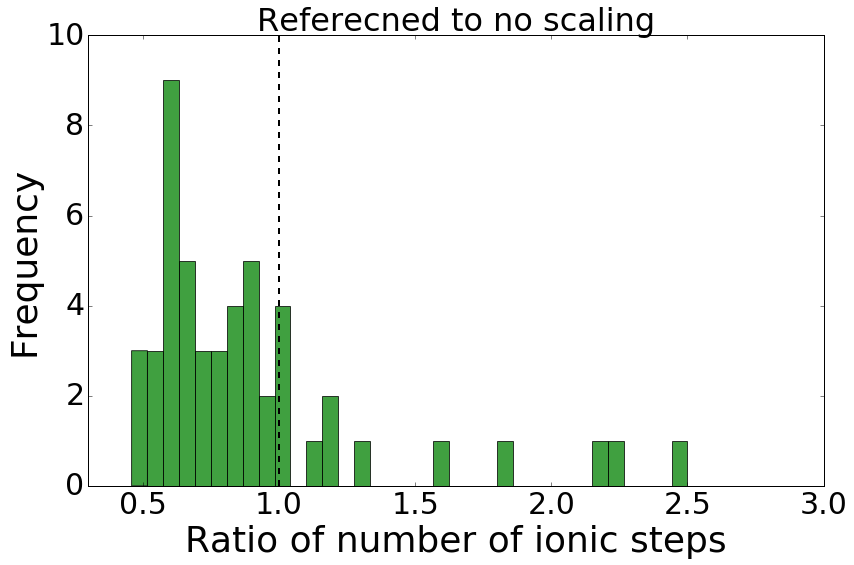

In [179]:
%matplotlib inline

nionic_ratio = [float(s)/n for s, n in zip(conditional_nionic, no_nionic)]

print(len(nionic_ratio), len([i for i in nionic_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(nionic_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("Ratio of number of ionic steps")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.xlim(0.3, 3)
plt.tight_layout()
plt.show()

50 37


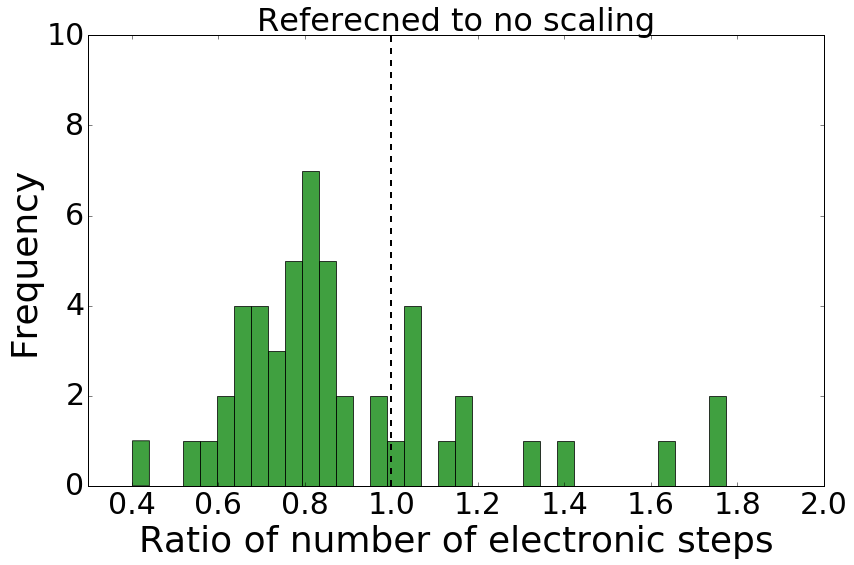

In [180]:
%matplotlib inline

nelect_ratio = [float(s)/n for s, n in zip(conditional_nelect, no_nelect)]

print(len(nelect_ratio), len([i for i in nelect_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(nelect_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("Ratio of number of electronic steps")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.xlim(0.3, 2)
plt.tight_layout()
plt.show()

50 36


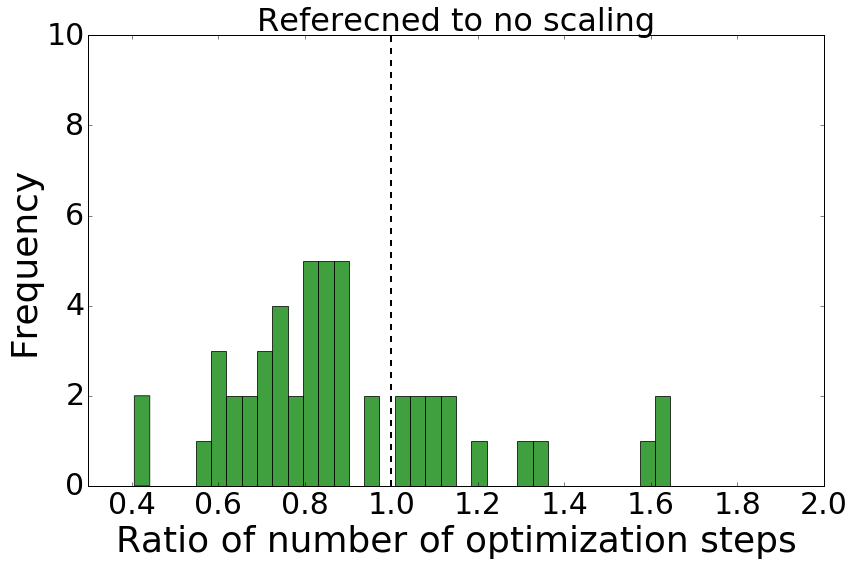

In [181]:
%matplotlib inline

ncg_ratio = [float(s)/n for s, n in zip(conditional_ncg, no_ncg)]

print(len(ncg_ratio), len([i for i in ncg_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(ncg_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("Ratio of number of optimization steps")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.xlim(0.3, 2)
plt.tight_layout()
plt.show()

50 37


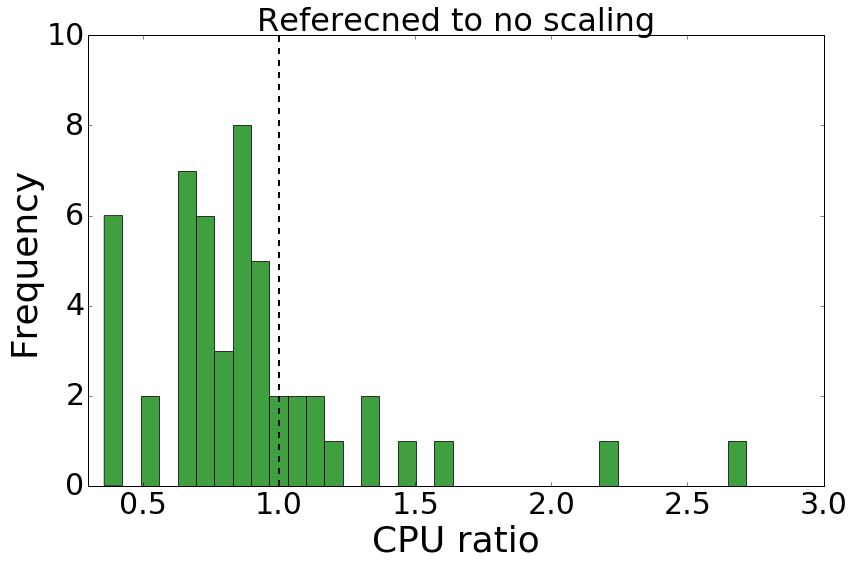

In [182]:
%matplotlib inline

cpu_ratio = [float(s)/n for s, n in zip(conditional_cpu, no_cpu)]

print(len(cpu_ratio), len([i for i in cpu_ratio if i < 1]))

plt = get_publication_quality_plot(12,8)
# the histogram of the data
plt.hist(cpu_ratio, 35, facecolor='green', alpha=0.75)
plt.xlabel("CPU ratio")
plt.ylabel("Frequency")
plt.title("Referecned to no scaling", fontsize=32)
plt.axvline(x=1.0, ymin=0.0, ymax = 10.0, linewidth=2, color='k', ls="--")
plt.ylim(0, 10)
plt.xlim(0.3, 3)
plt.tight_layout()
plt.show()

In [183]:
print(sub_formula, len(sub_formula))

['Ba6Y2Si4O17', 'Ba2Mg(BO3)2', 'BaMg2(PO4)2', 'BaY2(B2O5)2', 'BaLi2P2O7', 'BaMg3(SiO4)2', 'BaMgAl4O8', 'BaMgAl2O5', 'Ba3Mg3(PO4)4', 'BaMgSiO4', 'Ba3Y2SiO8', 'Ba4Li2B4O11', 'Ba2Li2(SiO3)3', 'BaMgB2O5', 'Ca3Y(PO4)3', 'CaMg3Al8O16', 'CaY2(BO2)8', 'CaY2(P2O7)2', 'CaY2(SiO4)2', 'Ca2YAlO5', 'Ca2YPO6', 'CaY2(SiO4)2', 'Ca3Mg3Al4O12', 'Ca2MgB4O9', 'Ca8Y10B12O41', 'CaYPO5', 'Sr2Mg(PO4)2', 'SrMgP2O7', 'SrLiBO3', 'SrMg2(PO4)2', 'Sr2YAlO5', 'SrYAlO4', 'SrYAlO4', 'Sr3Y3Al5O15', 'SrMgP2O7', 'SrYAlO4', 'Ag7P3O11', 'Al2O3', 'FePS4', 'Ge3N4', 'K3PO4', 'KMnPO4', 'Li10Ge(PO6)2', 'Li7P3S11', 'MnPO4', 'Na10Sn(PS6)2', 'Na3PS4', 'Na5P3Se10', 'NaMnPO4', 'Si3N4'] 50
